In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from geopy.geocoders import Nominatim
from pandas_ods_reader import read_ods

#Set parameters to geolocate
geolocator = Nominatim(user_agent="useer_agent", domain='nominatim.openstreetmap.org')
geocode = partial(geolocator.geocode, language="it", country_codes = "ita")

#Reachable cities
dft = pd.read_csv("../Dati/distanze/times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
cities = dft.columns

def getLocation(name):
    geolocator = Nominatim(user_agent="useer_agent")
    geocode = partial(geolocator.geocode, language="it")
    location =geolocator.geocode(name)
    return location.latitude, location.longitude

In [40]:
#take times
coords = [ getLocation(city) for city in cities]

In [43]:
#Save list of cities and location
out=set(zip(cities, coords))
df = pd.DataFrame(columns=["City", "Lat", "Lon"])
for x in out:
    df=df.append({'City':x[0], 'Lat':x[1][0], 'Lon':x[1][1]}, ignore_index=True)
df.to_csv("../Dati/altro/CitiesLocation.csv", sep=";", index=False)

In [44]:
df=pd.read_csv("../Dati/altro/CitiesLocation.csv", delimiter=';')

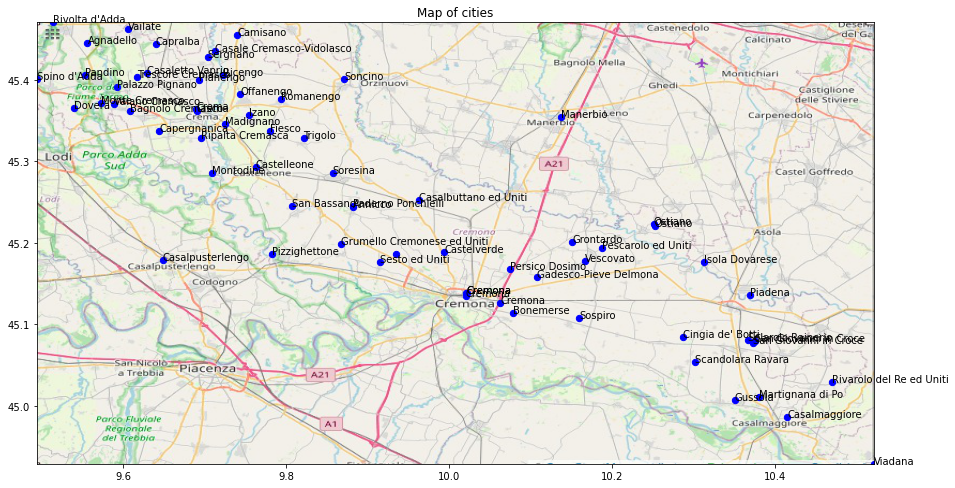

In [60]:
BBox = (df.Lon.min(), df.Lon.max(),
        df.Lat.min(), df.Lat.max())
ruh_m = plt.imread('../Dati/altro/map.jpeg')

fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(df.Lon, df.Lat, zorder=1, alpha=1, c='b', s=40)
ax.set_title('Map of cities')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
for i, txt in enumerate(cities[:len(cities)-1]):
    try:
        ax.annotate(txt[:txt.index(',')], (coords[i][1], coords[i][0]), zorder=2)
    except:
        ax.annotate(txt, (coords[i][1], coords[i][0]), zorder=2)
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
